<a href="https://colab.research.google.com/github/Suhit97/Vision_SAM/blob/master/MNIST_basic_clothing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.0


####Import the Fashion MNIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

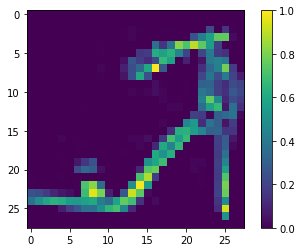

In [13]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()


##Preprocess the Data

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


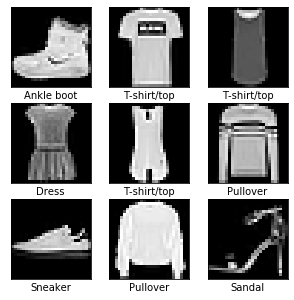

In [15]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()


##Build the model

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [18]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4950 - acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3731 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3354 - acc: 0.8783
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3130 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2956 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2805 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2684 - acc: 0.9006
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2576 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2463 - acc: 0.9082
Epoch 10/10
60000/60000 [==============================] - 

## Evaluate Accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3330 - acc: 0.8853

Test accuracy: 0.8853


##Make Predictions

In [0]:
predictions = model.predict(test_images)


In [21]:
predictions[0]


array([2.8987847e-06, 1.3710520e-09, 5.6077079e-07, 2.8204532e-09,
       3.4812128e-06, 1.0083923e-03, 6.3544840e-06, 6.0527664e-02,
       3.5462074e-07, 9.3845028e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [22]:
np.argmax(predictions[0])


9

In [23]:
#shows that this classification is correct:

test_labels[0]


9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


## Verify Predictions

 Correct prediction labels are blue and incorrect prediction labels are red

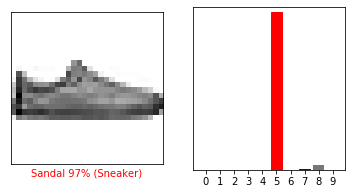

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


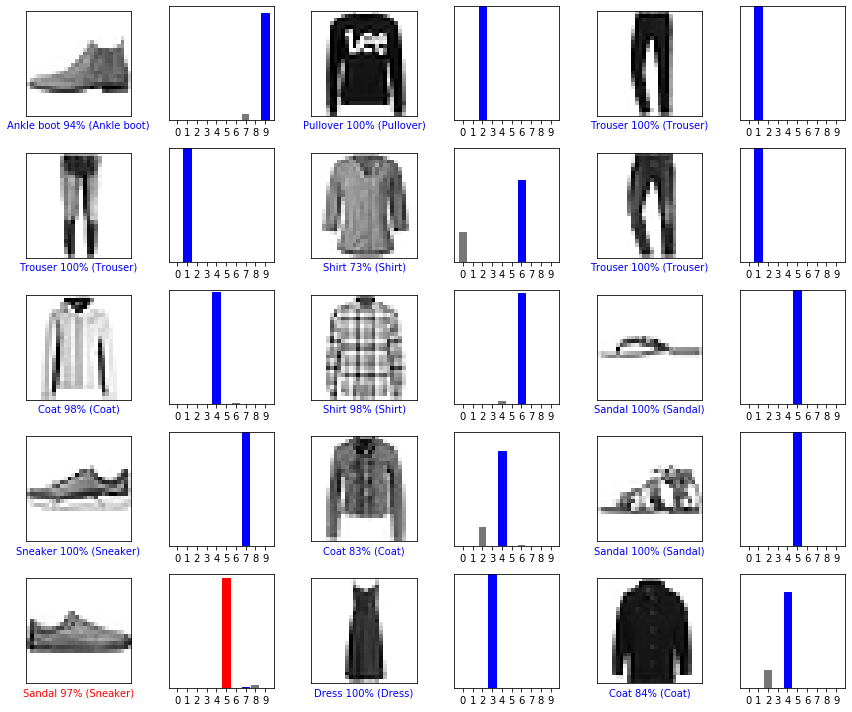

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [27]:
# Grab an image from the test dataset.
img = test_images[1]
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
 
predictions_single = model.predict(img)

print(predictions_single)


(1, 28, 28)
[[2.3961525e-06 1.8560359e-13 9.9990022e-01 3.5880532e-12 9.6005599e-05
  2.5812160e-15 1.3759251e-06 2.2932482e-18 2.4204617e-11 4.4086540e-15]]


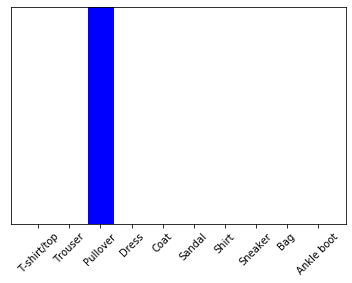

In [29]:
np.argmax(predictions_single[0])
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

